In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import skimage

### Q1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

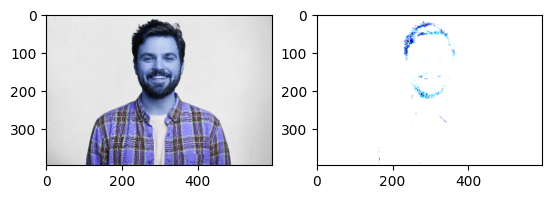

In [24]:
# Read the image
img = cv2.imread("images/man.jpg")
image = cv2.resize(img,(0,0), fx=0.07, fy=0.07)
plt.gray()

f, arr0 = plt.subplots(1,2)

# Get the desired number of intensity levels
num_levels = int(input("Enter the number of intensity levels (in powers of 2): "))

# Get the maximum intensity level for the desired number of levels
max_level = 2**num_levels - 1

# Normalize the image to the range [0, max_level]
img = (image / 256) * max_level

# Round the image to the nearest integer
img = np.round(img)

arr0[0].imshow(image)
arr0[1].imshow(img)


### Q2

Text(0.5, 1.0, '20 x 20')

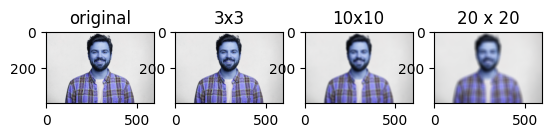

In [25]:
f, arr = plt.subplots(1,4)
plt.gray()

#for 3x3
image3k = cv2.blur(image,(3,3))

#for 10x10
image10k = cv2.blur(image,(10,10))

#for 20x20
image20k = cv2.blur(image,(20,20))

#show images
arr[0].imshow(image)
arr[0].set_title('original')
arr[1].imshow(image3k)
arr[1].set_title('3x3')
arr[2].imshow(image10k)
arr[2].set_title('10x10')
arr[3].imshow(image20k)
arr[3].set_title('20 x 20')

### Q3

Text(0.5, 1.0, '90 degrees rotation')

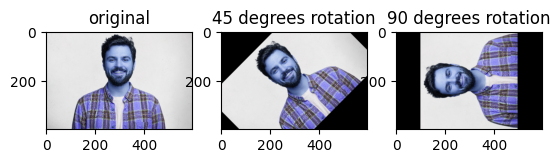

In [26]:
plt.gray()

h, w = image.shape[:2]

M_45 = cv2.getRotationMatrix2D((w/2, h/2), 45, 1)# Define the rotation matrix for 45 degrees
rotated_45 = cv2.warpAffine(image, M_45, (w, h))# Rotate the image by 45 degrees


M_90 = cv2.getRotationMatrix2D((w/2, h/2), 90, 1)# Define the rotation matrix for 90 degrees
rotated_90 = cv2.warpAffine(image, M_90, (w, h))# Rotate the image by 90 degrees

f, arr2 = plt.subplots(1,3)
arr2[0].imshow(image)
arr2[0].set_title('original')
arr2[1].imshow(rotated_45)
arr2[1].set_title('45 degrees rotation')
arr2[2].imshow(rotated_90)
arr2[2].set_title('90 degrees rotation')

### Q4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


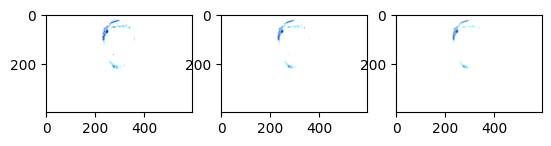

In [29]:
# for 3x3 block
arr3 = np.ones((3,3),np.float32)/9
Image1 = cv2.filter2D(image,-1,arr3)

# for 5x5 block
arr4 = np.ones((5,5),np.float32)/25
Image2 = cv2.filter2D(image,-1,arr4)

# for 7x7 block
arr5 = np.ones((7,7),np.float32)/49
Image3 = cv2.filter2D(image,-1,arr5)

# Save the new images
f, arr2 = plt.subplots(1,3)
arr2[0].imshow(Image1)
arr2[1].imshow(Image2)
arr2[2].imshow(Image3)